In [51]:
import rasterio
import numpy
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob

# Grab all images from same satellite

- cross-correlate images to find any systematic displacement
- correct images by displacement (choose largest)
- stitch together and adjust radiometry
- re-write as the satellite image

# Grab all satellite chunks

- determine which has the greatest coverage of glacier and fewest clouds? and keep only the best

OR 

- mosaick them all together

# Read in glacier outline

In [ ]:
shp_path = '/'

In [58]:
folderpath = '/Volumes/LaCie/PS_downloads_SK/download/PSScene/' # path to folders with downloaded images (monthly_

# Gather number of tiles and satellite passes for days in the month

In [22]:
# grab all satellite IDs and dates of imagery
filelist = os.listdir(folderpath); filelist.sort()
dates = []; IDs = []; files = []
no_tiles  = 0
for file in filelist:
    if file.startswith('2') and file.endswith('harmonized_clip.tif'):
        date = file.split('_')[0] # grab the date
        sID = file.split('_')[-6] # grab the satellite ID (4 digit code)
        dates.append(date); IDs.append(sID); files.append(file) # append to list
        no_tiles+=1
sorted_dates = list(set(list(zip(dates, IDs)))) # set of the zipped date and ID
sorted_dates.sort() # sorted
satdate_df = pd.DataFrame(sorted_dates, columns=['date','sat_ID'])
satdate_df.head()

,date,sat_ID
0,20200301,106f
1,20200302,105a
2,20200302,106b
3,20200303,1058
4,20200303,106c


In [23]:
# grab unique dates
unique_dates = list(set(satdate_df.date))
unique_dates.sort()
print(unique_dates)

['20200301', '20200302', '20200303', '20200304', '20200305', '20200306', '20200307', '20200308', '20200311', '20200312', '20200313', '20200314', '20200315', '20200316', '20200317', '20200318', '20200319', '20200320', '20200322', '20200323', '20200324', '20200325', '20200326', '20200327', '20200328', '20200329', '20200330']


In [25]:
# Print stats for the month:
print('For',unique_dates[0][:4], 'month', unique_dates[0][4:6],':')
print(no_tiles, 'total image tiles were acquired')
print('over',len(unique_dates),'days')

For 2020 month 03 :
250 total image tiles were acquired
over 27 days


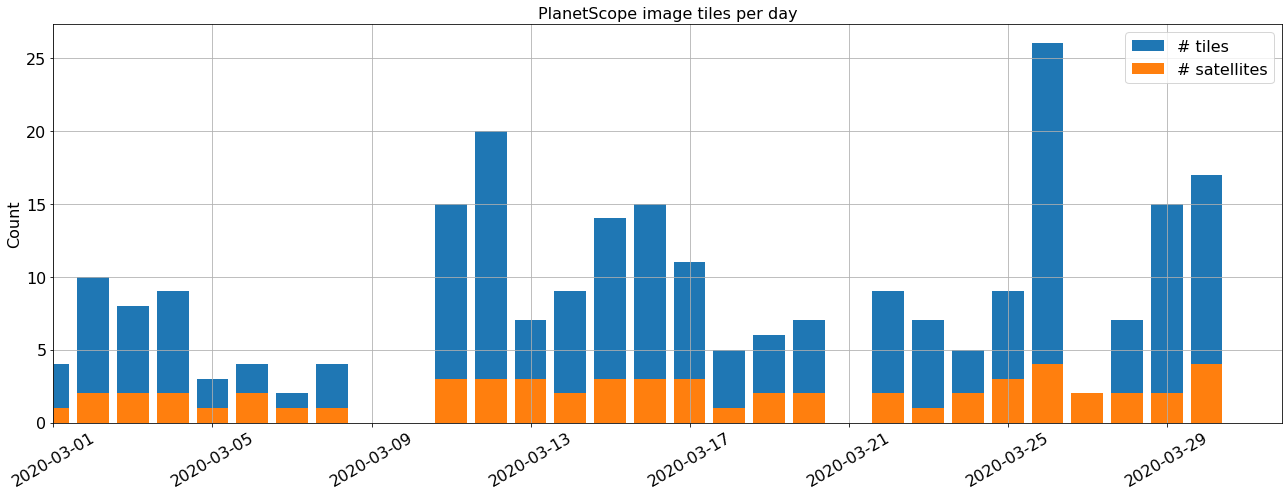

In [70]:
# count number of satellites per day and number of tiles per day
satdates = []; no_sats = []; no_tiles_day = [];

for datestr in unique_dates:
    sat_df = satdate_df[satdate_df.date == datestr]
    sats_per_day = len(sat_df)
    satdates.append(datestr); no_sats.append(sats_per_day)
    
    tile_count = 0
    for idx, row in sat_df.iterrows():
        tile_count+=len(glob.glob(folderpath+'*'+datestr+'*'+row.sat_ID+'*harmonized_clip.tif'))
    no_tiles_day.append(tile_count)
# avg_tiles_per_sat = 
# plot
fs = 16
plt.figure(figsize=(18,7))
plt.bar(pd.to_datetime(satdates, format='%Y%m%d'), no_tiles_day)
plt.bar(pd.to_datetime(satdates, format='%Y%m%d'), no_sats)
plt.xlim(datetime.datetime(int(unique_dates[0][:4]),int(unique_dates[0][4:6]),1))
plt.xticks(rotation=30,fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Count',fontsize=fs)
plt.title('PlanetScope image tiles per day',fontsize=fs)
plt.legend(['# tiles','# satellites'],fontsize=fs)
plt.grid()
plt.tight_layout()
plt.show()

# Coregister all tiles for each unique satellite pass

In [71]:
for idx, row in satdate_df.iterrows():
    tile_filenames = glob.glob(folderpath+'*'+row.date+'*'+row.sat_ID+'*harmonized_clip.tif')
    print(tile_filenames)
    
    # determine file with largest coverage

['/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200301_192304_14_106f_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200301_192257_98_106f_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200301_192300_03_106f_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200301_192302_09_106f_3B_AnalyticMS_SR_harmonized_clip.tif']
['/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200302_204055_04_105a_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200302_204103_24_105a_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200302_204101_19_105a_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200302_204057_09_105a_3B_AnalyticMS_SR_harmonized_clip.tif', '/Volumes/LaCie/PS_downloads_SK/download/PSScene/20200302_204059_14_105a_3B_AnalyticMS_SR_harmonized_c